In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

## Import Data and understanding the Data

In [2]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We can see there is no missing values in any column. So the data is good 

## Data Preparation

#### As we can see above the data is clean . It has no missing values.

#### Encoding the catgorical number columns into their actual meaning in the categorical columns. 

In [5]:
# Encoding or mapping the season column
bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Encoding or mapping the month column
bike.mnth = bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Encoding or mapping the weekday column
bike.weekday = bike.weekday.map({ 0 :'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})

# Encoding or mapping the weathersituation column
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Mist',3:'Moderate',4:'Severe'})


In [6]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
#dropping unwanted columns
#'instant' : we can drop this column as it is only a index
#'registered' & 'registered' : we can drop them as they are not features
#'dteday' : we can drop this column as there already exists separate columns for year & month, so it is redundant.

bike = bike.drop(['instant', 'dteday','casual','registered'], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


###  Data Visualization

##### Visualising Numeric Variables

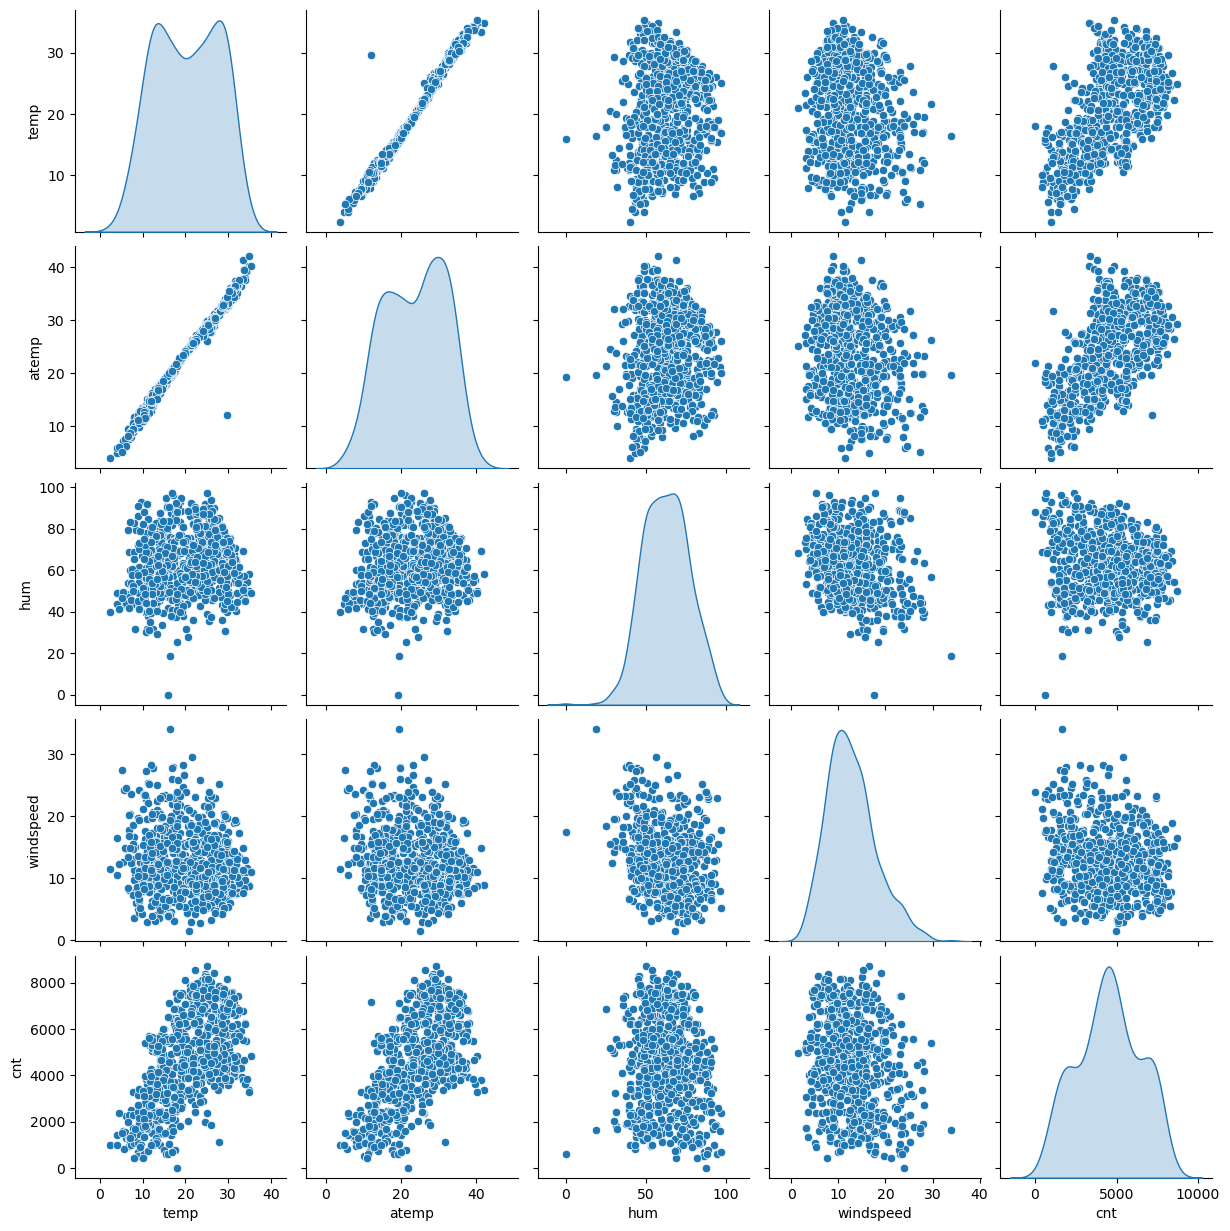

In [10]:
sns.pairplot(bike, vars=['temp','atemp','hum','windspeed',"cnt"], diag_kind='kde')
plt.show()

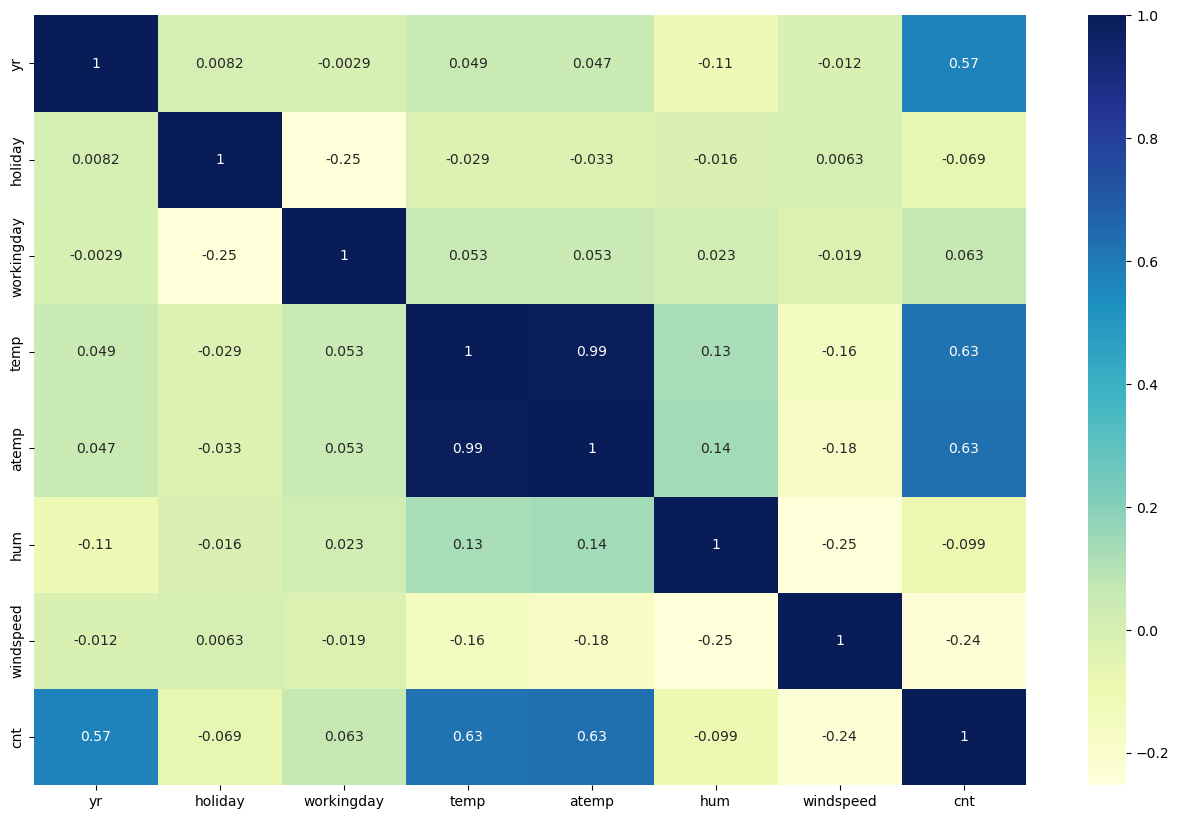

In [11]:
# from above graphs we can conclude that temp and atemp have a relationship
#checking correlation between them
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(numeric_only=True), annot = True, cmap="YlGnBu")
plt.show()

In [12]:
#### Dropping temp as it is highly correlated with atemp sowhn above from the pairplot and the heatmap (0.99), 

bike.drop(['temp'],axis=1,inplace=True)
bike.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,11.46350,43.6957,12.522300,1600


##### Visualising Categorical Variables

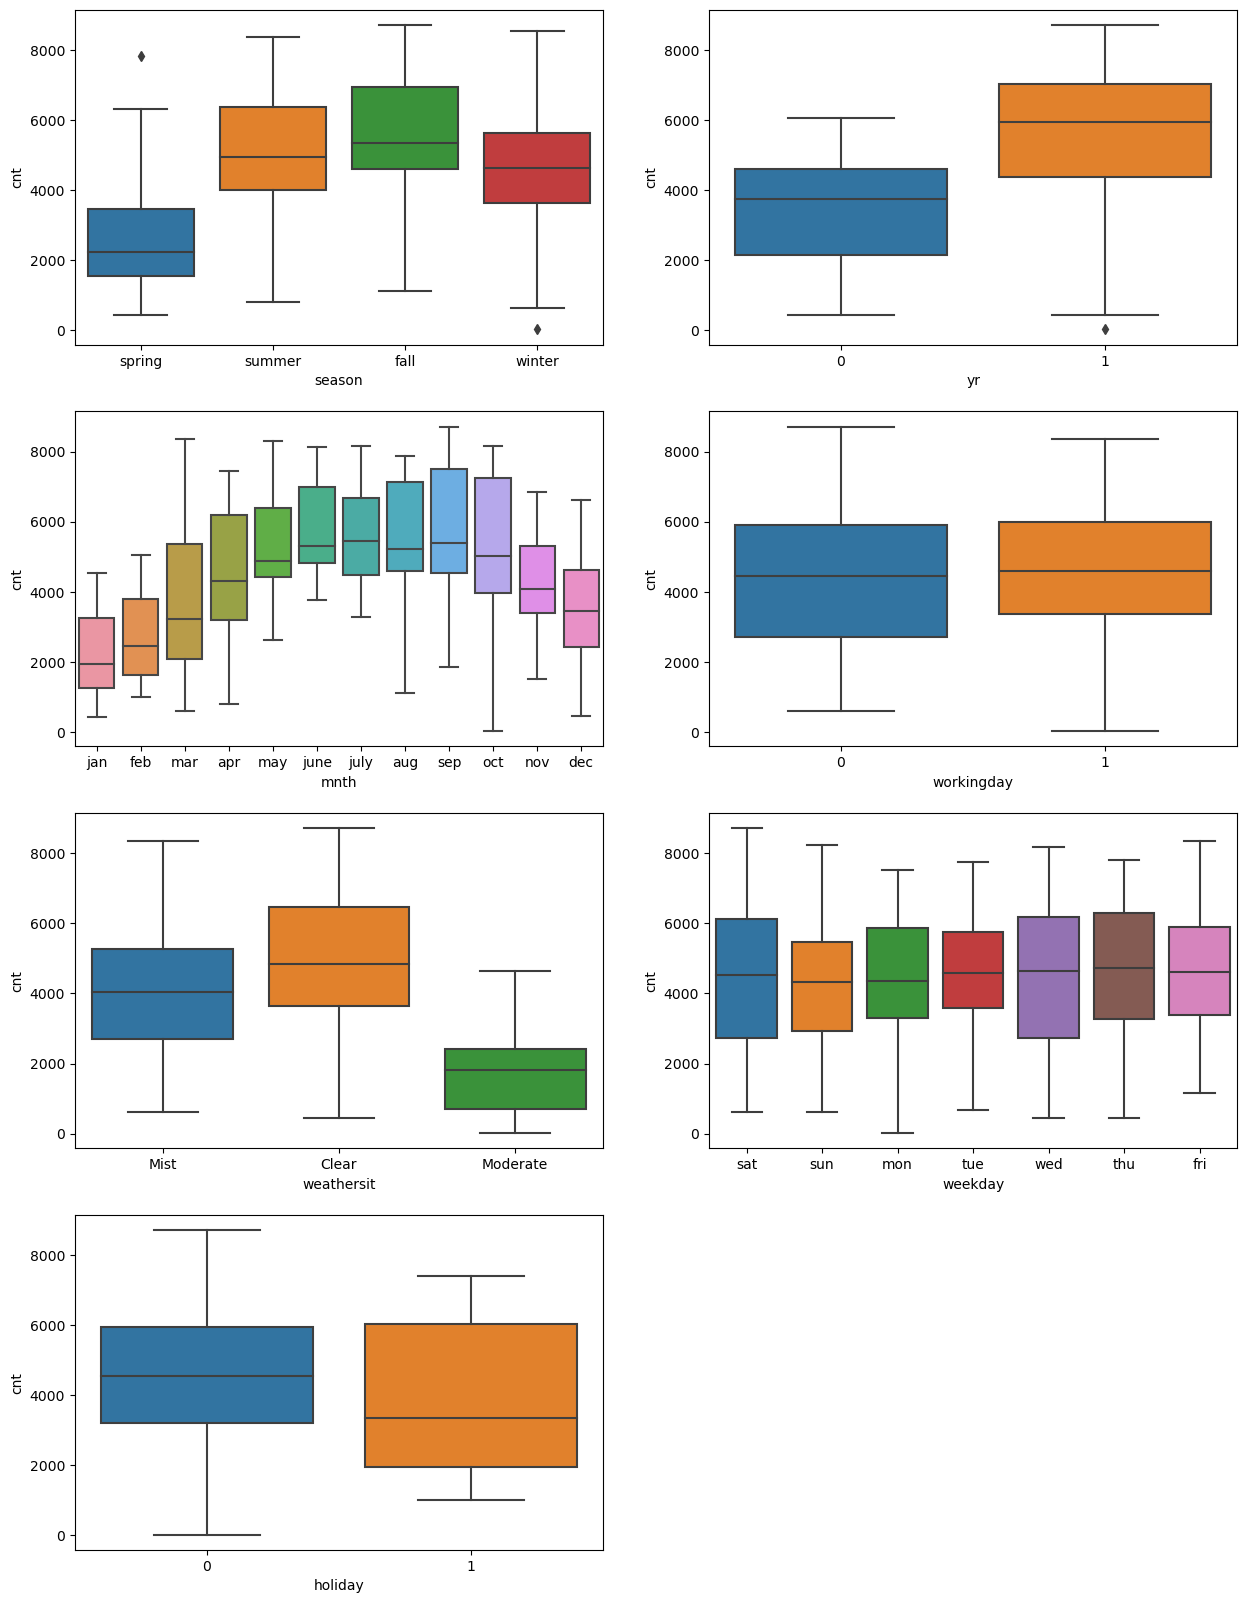

In [13]:
#box plots for all categorical variables against target variable 'cnt'

cat_cols = ["season","yr","mnth","workingday","weathersit","weekday","holiday"]


plt.figure(figsize=(15, 20))

plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(4,2,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(4,2,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(4,2,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(4,2,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)

plt.show()

 NOTE: We can infer that the below points:
            1) FALL -Season has a good demand for the bikes followed by Summer & Winter.
            2) Year 2019 has very good amount of booking as compared to previous year.
            3) The demand for bikes is increasing every month till June. from June to September the demand is steady having Septembr
            month as highest demand and then there is a decline in demand for bikes in last three months.
            4) Holiday has a increased demand for bikes.
            5) Clear weather has the highest demand for bikes.
            6) Weekday do not show any significant trend on the demand of the bikes. They may or may not be a good feature.
            

In [14]:
#creating dummies and dropping the first column from status

dummy = pd.get_dummies(bike[['season','mnth','weekday','weathersit']], drop_first = True, dtype=int)
dummy.head()


,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Moderate
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
# Add dummy to the original bike dataframe

bike = pd.concat([bike, dummy], axis = 1)

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Moderate
0,spring,0,jan,0,sat,0,Mist,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,1,0
1,spring,0,jan,0,sun,0,Mist,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,1,0
2,spring,0,jan,0,mon,1,Clear,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [16]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   season               730 non-null    object 
 1   yr                   730 non-null    int64  
 2   mnth                 730 non-null    object 
 3   holiday              730 non-null    int64  
 4   weekday              730 non-null    object 
 5   workingday           730 non-null    int64  
 6   weathersit           730 non-null    object 
 7   atemp                730 non-null    float64
 8   hum                  730 non-null    float64
 9   windspeed            730 non-null    float64
 10  cnt                  730 non-null    int64  
 11  season_spring        730 non-null    int32  
 12  season_summer        730 non-null    int32  
 13  season_winter        730 non-null    int32  
 14  mnth_aug             730 non-null    int32  
 15  mnth_dec             730 non-null    int

In [17]:
# Dropping original columns as we have created the dummies for it.

bike.drop(['season','weathersit','weekday','mnth'], axis=1, inplace=True)

bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Moderate
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
bike.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Moderate
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.336986,0.028767
std,0.500343,0.167266,0.465405,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.473004,0.167266
min,0.000000,0.000000,0.000000,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting the Data into Training and Testing Sets


In [19]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Moderate
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [21]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Moderate
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,22.85230,81.2917,13.250121,2659,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [23]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,23.493909,63.112926,12.831318,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,8.090038,14.156632,5.291832,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Rescaling Numerical columns

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [25]:
num_vars=['atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [26]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Moderate
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [27]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [28]:
y_train = df_train.pop('cnt')
X_train = df_train

In [29]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Mist', 'weathersit_Moderate'],
      dtype='object')

### Building a linear model using RFE(Recursive feature elimination)

In [30]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
# Running RFE with the output number of the variables equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train) 

rfe = RFE(lm, n_features_to_select=15)       # running RFE     
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('mnth_aug', False, 6),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 7),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 4),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_Mist', True, 1),
 ('weathersit_Moderate', True, 1)]

In [33]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_july', 'mnth_nov',
       'mnth_sep', 'weekday_sat', 'weathersit_Mist', 'weathersit_Moderate'],
      dtype='object')

In [34]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

## Building a linear model using statsmodels

In [35]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [36]:
#Build a linear model

X_train_rfe1 = sm.add_constant(X_train_rfe)

# Running the linear model
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

lm1.params

const                  0.366172
yr                     0.232598
holiday               -0.084117
atemp                  0.446979
hum                   -0.147689
windspeed             -0.169162
season_spring         -0.106986
season_winter          0.066155
mnth_dec              -0.048480
mnth_jan              -0.051525
mnth_july             -0.067871
mnth_nov              -0.050182
mnth_sep               0.058559
weekday_sat            0.018187
weathersit_Mist       -0.058230
weathersit_Moderate   -0.250410
dtype: float64

In [37]:
#summary of linear model build
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Wed, 29 May 2024   Prob (F-statistic):          9.67e-187
Time:                        21:39:36   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3662    

In [38]:
...

Ellipsis

In [39]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.88
4,windspeed,4.03
6,season_winter,2.93
5,season_spring,2.89
13,weathersit_Mist,2.26
0,yr,2.06
10,mnth_nov,1.82
8,mnth_jan,1.75
7,mnth_dec,1.54


In [41]:
#Since column HUM(humidity) has a very high VIF hence dropping it 
X_train_rfe = X_train_rfe.drop(['hum'],axis=1)

In [42]:
# Build a new second fitted model
import statsmodels.api as sm 
X_train_rfe2 = sm.add_constant(X_train_rfe)

lm2 = sm.OLS(y_train,X_train_rfe2).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.7
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.10e-184
Time:                        21:39:36   Log-Likelihood:                 501.21
No. Observations:                 510   AIC:                            -972.4
Df Residuals:                     495   BIC:                            -908.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2902    

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.61
3,windspeed,3.98
5,season_winter,2.55
4,season_spring,2.36
0,yr,2.06
9,mnth_nov,1.80
7,mnth_jan,1.65
12,weathersit_Mist,1.53
6,mnth_dec,1.46
8,mnth_july,1.35


In [44]:
#Since column weekday_sat has a high p-value, so we drop it 
X_train_rfe = X_train_rfe.drop(['weekday_sat'],axis=1)

In [45]:
# Build a new third fitted model
import statsmodels.api as sm 
X_train_rfe3 = sm.add_constant(X_train_rfe)

lm3 = sm.OLS(y_train,X_train_rfe3).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.95e-185
Time:                        21:39:37   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2931    

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.57
3,windspeed,3.95
5,season_winter,2.55
4,season_spring,2.35
0,yr,2.06
9,mnth_nov,1.80
7,mnth_jan,1.65
11,weathersit_Mist,1.53
6,mnth_dec,1.46
8,mnth_july,1.35


In [47]:
#Since column mnth_nov has a high p-value, so we drop it 
X_train_rfe = X_train_rfe.drop(['mnth_nov'],axis=1)

In [48]:
# Build a new fourth fitted model
import statsmodels.api as sm 
X_train_rfe4 = sm.add_constant(X_train_rfe)

lm4 = sm.OLS(y_train,X_train_rfe4).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          8.41e-185
Time:                        21:39:37   Log-Likelihood:                 495.96
No. Observations:                 510   AIC:                            -965.9
Df Residuals:                     497   BIC:                            -910.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2803    

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.54
3,windspeed,3.91
4,season_spring,2.35
0,yr,2.06
5,season_winter,1.64
7,mnth_jan,1.64
10,weathersit_Mist,1.53
8,mnth_july,1.35
6,mnth_dec,1.29
9,mnth_sep,1.20


In [50]:
#Since column mnth_dec has a high p-value, so we drop it 
X_train_rfe = X_train_rfe.drop(['mnth_dec'],axis=1)

In [51]:
# Build a new fifth fitted model
import statsmodels.api as sm 
X_train_rfe5 = sm.add_constant(X_train_rfe)

lm5 = sm.OLS(y_train,X_train_rfe5).fit()

print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Wed, 29 May 2024   Prob (F-statistic):          5.75e-185
Time:                        21:39:38   Log-Likelihood:                 493.54
No. Observations:                 510   AIC:                            -963.1
Df Residuals:                     498   BIC:                            -912.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2685    

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.54
3,windspeed,3.91
4,season_spring,2.24
0,yr,2.06
6,mnth_jan,1.60
9,weathersit_Mist,1.53
5,season_winter,1.40
7,mnth_july,1.35
8,mnth_sep,1.20
10,weathersit_Moderate,1.08


In [53]:
#Since column mnth_jan has a high p-value, so we drop it 
X_train_rfe = X_train_rfe.drop(['mnth_jan'],axis=1)

In [54]:
# Build a new sixth fitted model
import statsmodels.api as sm 
X_train_rfe6 = sm.add_constant(X_train_rfe)

lm6 = sm.OLS(y_train,X_train_rfe6).fit()

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          5.68e-185
Time:                        21:39:38   Log-Likelihood:                 490.70
No. Observations:                 510   AIC:                            -959.4
Df Residuals:                     499   BIC:                            -912.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2544    

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.51
3,windspeed,3.90
0,yr,2.05
4,season_spring,1.63
8,weathersit_Mist,1.52
5,season_winter,1.40
6,mnth_july,1.35
7,mnth_sep,1.20
9,weathersit_Moderate,1.08
1,holiday,1.04


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [56]:
y_train_cnt = lm6.predict(X_train_rfe6)

Text(0.5, 0, 'Errors')

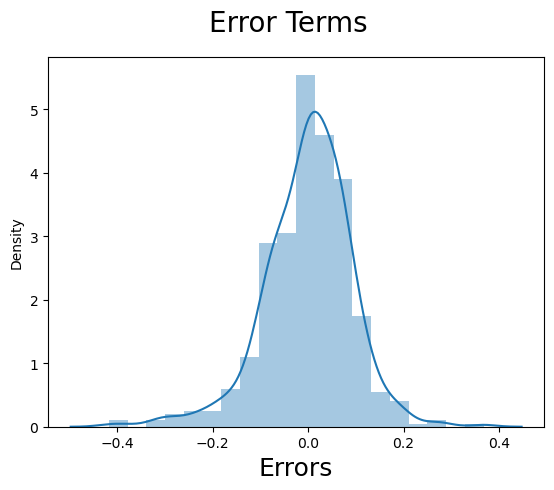

In [57]:
# Plot the histogram of the error terms, 
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label  

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. sixth model.

In [58]:
num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])


In [59]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [60]:
y_test = df_test.pop('cnt')
X_test = df_test

In [61]:
# Creating X_test_new dataframe by dropping variables from X_test

X_train_new = X_train_rfe6.drop(['const'], axis=1)

X_test_new = X_test[X_train_new.columns]

# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test_new)

In [62]:
#Making predictions on the chosen model

y_pred = lm6.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

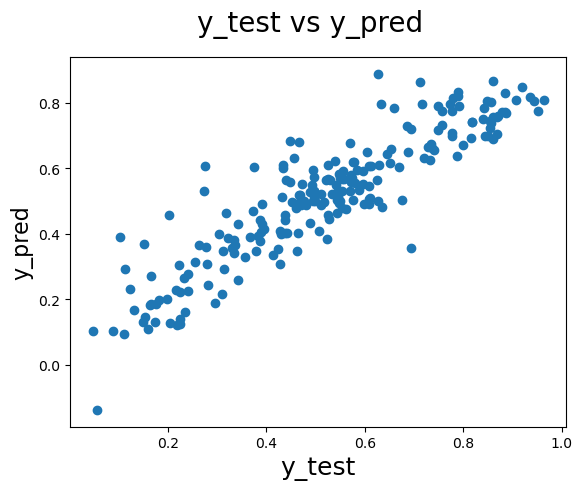

In [63]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt
i.e demand significantly overlapped, 
thus indicating that the model is able to explain the change in demand very well.

Text(0, 0.5, 'Views')

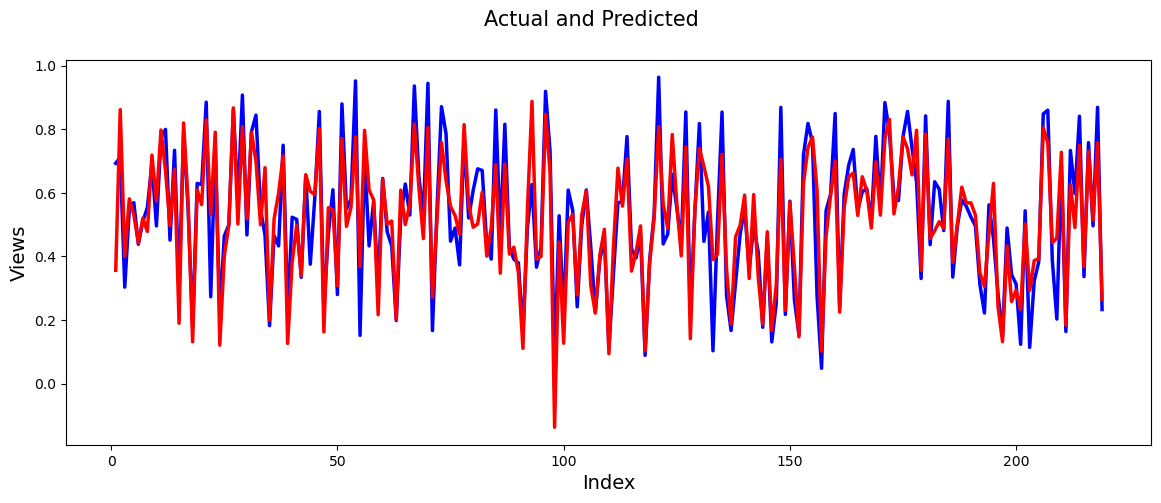

In [64]:
#Actual vs Predicted
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=14)                               # X-label
plt.ylabel('Views', fontsize=14)                               # Y-label



NOTE: prediction of data seems very close to actual

Text(0, 0.5, 'Views_show-Predicted_views')

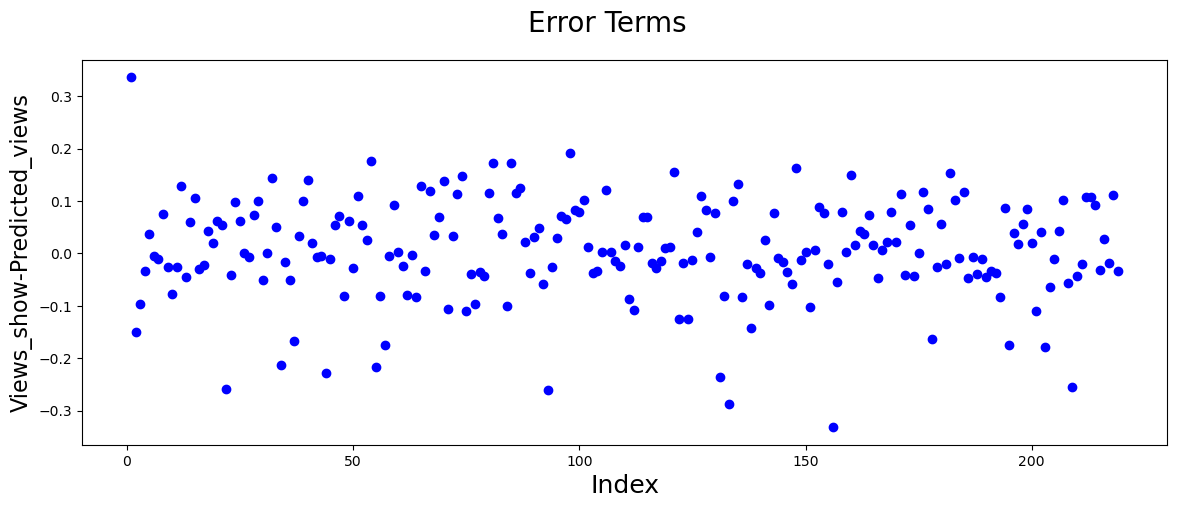

In [65]:
# Error terms
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test-y_pred, color="blue", marker='o', linewidth=2.5, linestyle="")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well 
by the model and there are no other parameters that can explain the model better.

#### R^2 and Adjusted R^2 Value for TEST

In [66]:
from sklearn.metrics import r2_score

In [67]:
#Calculate the r square for test
r_squared = r2_score(y_test, y_pred)
r_squared

0.8089924291633283

In [68]:
#Therfore R square of our model is 80.8

In [69]:
X_test_new = X_test_new.drop(['const'], axis=1)

X_test_new.shape

# n is number of rows in X

n = X_test_new.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r_squared)*(n-1)/(n-p-1)
adjusted_r2

0.7998093728731037

#### Adjusted R^2 Value for TEST : 80%
#### Adjusted R^2 Value for Train : 82.7%

We can see that the equation for best fitted line is:
    
cnt = 0.235 X yr - 0.095 X holiday + 0.464 X atemp - 0.126 x windspeed - 0.1174 x spring + 0.039 x winter - 0.068 x july +
  + 0.060 x Sep - 0.082 x weathersit_Mist -0.2819 x weathersit_Moderate
